### Hyper minmaxscaler

In [25]:
import talib as ta

from datetime import datetime
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

def get_score(model, x_train=0, x_test=0):
    if not x_train or not x_test:
        x_train = X_train
        x_test = X_test
    y_pred = model.predict(x_test)
    print('train: {}'.format(model.score(x_train, y_train) * 100))
    print('test: {}'.format(model.score(x_test, y_test) * 100))
    print('accuracy score: {}'.format(accuracy_score(y_test, y_pred) * 100))

def return_plot(estimator, plot=False):
    split=0
    df['Predicted_Signal'] = estimator.predict(X)
    Cumulative_returns = np.cumsum(df[half_split:]['Returns'])
    df['Startegy_returns'] = df['Returns']* df['Predicted_Signal'].shift(1)
    Cumulative_Strategy_returns = np.cumsum(df[half_split:]['Startegy_returns'])
    print('Return: {}%'.format(Cumulative_Strategy_returns[-1]*100))
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(Cumulative_returns, color='r',label = 'Returns')
        plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
        plt.legend()
        plt.show()

def roc_plot(estimator, auc_cv=False, title="ROC Curve"):
    y_pred = estimator.predict(X_test)
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    #y_pred_prob = y_pred
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print('Model Score: {}'.format(estimator.score(X_test, y_test)))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

    #If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    
    if (auc_cv):
        cv_auc = cross_val_score(estimator, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
        print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
        
best_params = {'C': 3792.690190732246,
 'class_weight': None,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 1e-05}

In [3]:
df = pd.read_csv('data/data3_H1.csv', parse_dates=['Datetime'], index_col='Datetime')

In [4]:
X = df.drop('Target', axis=1).values
y = df.Target.values

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.40, random_state=42)

half_split = int(len(X_tmp) / 2)
X_test = X_tmp[:half_split]
X_final = X_tmp[half_split:]
y_test = y_tmp[:half_split]
y_final = y_tmp[half_split:]

In [5]:
minMaxScaler = MinMaxScaler()
X_train = minMaxScaler.fit_transform(X_train)
X_test = minMaxScaler.transform(X_test)
X_final = minMaxScaler.transform(X_final)

In [6]:
log = LogisticRegression(**best_params)
log.fit(X_train, y_train)

/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)

In [13]:
get_score(log, x_test=X_final)

train: 52.94371026378815
test: 52.199307386158054
accuracy score: 52.199307386158054


Return: 4.785375971340444%


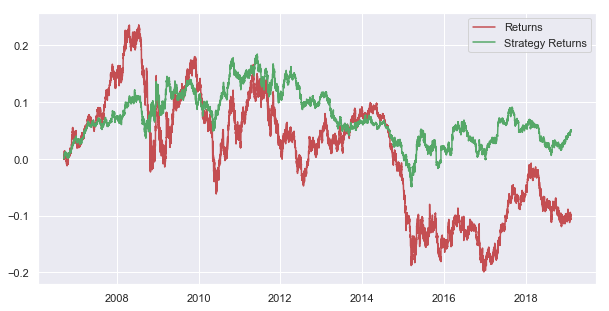

In [14]:
return_plot(log, plot=True)

In [16]:
with open('pickle/EURUSD_logistic_final_data3_H1.pickle', 'wb') as file:
    pickle.dump(log, file)

Model Score: 0.5219930738615806
Accuracy Score: 0.5219930738615806
[[5212 4505]
 [4743 4887]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      9717
           1       0.52      0.51      0.51      9630

   micro avg       0.52      0.52      0.52     19347
   macro avg       0.52      0.52      0.52     19347
weighted avg       0.52      0.52      0.52     19347



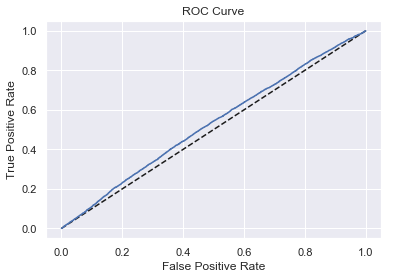

AUC: 0.5279413743307353
AUC scores computed using 5-fold cross-validation: 0.5339682354227162


In [26]:
roc_plot(log, auc_cv=True)